## **The data graph and analysis code for correlating the MBPI Questionnaire data with the Eye Openness Ratio, Blink Frequency, and Eye Fixations data**

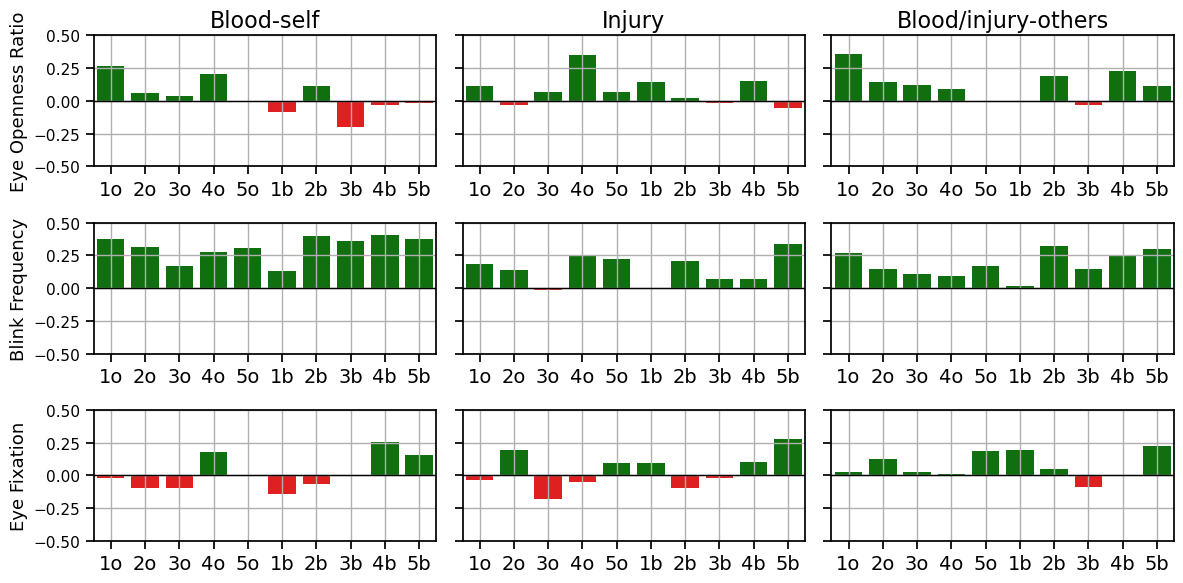

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("notebook")

df_list = []
corr_values_list = [
    [0.2686, 0.0564, 0.0382, 0.2045, -0.0095, -0.0826, 0.1118, -0.2032, -0.0343, -0.0168],
    [0.1099, -0.0281, 0.0678, 0.3533, 0.0683, 0.1413, 0.0229, -0.0131, 0.1518, -0.0517],
    [0.3544, 0.1462, 0.1195, 0.0937, -0.0005, 0.002, 0.191, -0.0294, 0.2297, 0.1134],
    [0.3707, 0.3167, 0.1668, 0.2736, 0.308, 0.1317, 0.3954, 0.36, 0.4052, 0.3713],
    [0.1854, 0.1374, -0.0125, 0.2423, 0.2229, 0.0015, 0.2092, 0.0679, 0.0712, 0.3378],
    [0.2686, 0.1459, 0.104, 0.0923, 0.1669, 0.0173, 0.3182, 0.147, 0.2555, 0.3011],
    [-0.0192, -0.0972, -0.0932, 0.181, -0.0059, -0.1422, -0.0658, 0.0036, 0.2533, 0.1518],
    [-0.0331, 0.1894, -0.1818, -0.0505, 0.0905, 0.0974, -0.0958, -0.0194, 0.1027, 0.2773],
    [0.0278, 0.1232, 0.0268, 0.0075, 0.1833, 0.1939, 0.049, -0.0911, -0.0044, 0.2247]
]

for i in range(9):
    df_temp = pd.DataFrame({
        'feature': ['1o', '2o', '3o', '4o', '5o', '1b', '2b', '3b', '4b', '5b'],
        'corr': corr_values_list[i]
    })
    df_temp['sign'] = df_temp['corr'].apply(lambda x: 'negative' if x < 0 else 'positive')
    df_list.append(df_temp)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 6))

for idx, ax in enumerate(axes.flat):
    df = df_list[idx]
    sns.barplot(
        x='feature', 
        y='corr',
        hue='sign',
        data=df,
        palette={'positive': 'green', 'negative': 'red'},
        dodge=False,
        ax=ax
    )
    ax.axhline(0, color='black', linewidth=1)
    
    if idx == 0:
        ax.set_title("Blood-self", fontsize=16)
    elif idx == 1:
        ax.set_title("Injury", fontsize=16)
    elif idx == 2:
        ax.set_title("Blood/injury-others", fontsize=16)
    else:
        ax.set_title("")
    
    ax.set_ylim(-0.5, 0.5)
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    if idx in [0, 3, 6]:
        if idx == 0:
            ax.set_ylabel("Eye Openness Ratio", fontsize=13)
        elif idx == 3:
            ax.set_ylabel("Blink Frequency", fontsize=13)
        elif idx == 6:
            ax.set_ylabel("Eye Fixation", fontsize=13)
        ax.set_yticks([-0.50, -0.25, 0, 0.25, 0.50])  # Set the y-axis scale
    else:
        ax.set_yticklabels([])  # Remove Y-Axis Scale

    # Resize X-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)  # Setting the x-axis font size

    ax.get_legend().remove()
    ax.grid(True)  # The grid remains visible

fig.tight_layout()
plt.show()
plt.savefig("fig_subscale_correlation.pdf", format='pdf')